In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

rating_cols = ['user_id', 'anime_id', 'rating']
ratings = pd.read_csv('/Users/brangmai/Desktop/Capstone/modified_data/rating.csv', names=rating_cols, usecols=range(3), encoding="ISO-8859-1")
ratings = ratings[1:]
ratings.head(10)

/Users/brangmai/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_id,anime_id,rating
1,1,8074,10
2,1,11617,10
3,1,11757,10
4,1,15451,10
5,2,11771,10
6,3,20,8
7,3,154,6
8,3,170,9
9,3,199,10
10,3,225,9


In [4]:
rating_stats = ratings.groupby('anime_id').agg({'rating': [np.size, np.mean]})
rating_stats.head(10)

rating          
           size      mean
anime_id                 
1          1423  8.889670
5           704  8.375000
6          1006  8.395626
7           285  7.533333
8            41  7.195122
15          204  8.519608
16          413  8.464891
17           65  8.200000
18          164  8.292683
19          421  8.883610

In [5]:
anime_num_ratings = pd.DataFrame(rating_stats['rating']['size'])

min_ratings = int(np.min(anime_num_ratings))
max_ratings = int(np.max(anime_num_ratings))

normalized_ratings = []
for i in anime_num_ratings:
    normalized_ratings.append((anime_num_ratings[i] - min_ratings) / (max_ratings - min_ratings))
    
normalized_ratings = pd.DataFrame(normalized_ratings)
#normalized_ratings.head(10)
normalized_ratings.size

13664

In [6]:
anime_cols = ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating']
anime = pd.read_csv('/Users/brangmai/Desktop/Capstone/modified_data/anime.csv', names=anime_cols, usecols=range(6), encoding="ISO-8859-1")
anime = anime[1:]
anime = pd.DataFrame(anime)
anime.head(10)

,anime_id,name,genre,type,episodes,rating
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82
2,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.4
3,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32
4,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36
5,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06
6,15,Eyeshield 21,"Action, Comedy, Shounen, Sports",TV,145,8.08
7,16,Hachimitsu to Clover,"Comedy, Drama, Josei, Romance",TV,24,8.18
8,17,Hungry Heart: Wild Striker,"Comedy, Shounen, Slice of Life, Sports",TV,52,7.74
9,18,Initial D Fourth Stage,"Action, Cars, Drama, Seinen, Sports",TV,24,8.24
10,19,Monster,"Drama, Horror, Mystery, Police, Psychological,...",TV,74,8.72


In [7]:
anime.size

73764

# The highiest rated animes from all type

In [8]:
highiest_rated_anime = anime.sort_values(by='rating', ascending=False)
highiest_rated_anime.head(10)

,anime_id,name,genre,type,episodes,rating
10172,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.6
8664,23005,Mogura no Motoro,Slice of Life,Movie,1,9.5
11104,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37
11734,33607,Kahei no Umi,Historical,Movie,1,9.33
3898,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26
9361,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25
9731,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25
5576,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17
5896,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16
11405,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15


# The highiest rated movies

In [9]:
anime_movies = anime.loc[anime['type'] == 'Movie']
anime_movies = anime_movies.sort_values(by='rating', ascending=False)
#anime_movies.reset_index(drop=True, inplace=True)
anime_movies.head(10)

,anime_id,name,genre,type,episodes,rating
8664,23005,Mogura no Motoro,Slice of Life,Movie,1,9.5
11104,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37
11734,33607,Kahei no Umi,Historical,Movie,1,9.33
7128,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.1
9704,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05
11319,32796,Shenmi Shijie Lixian Ji,"Adventure, Comedy, Fantasy",Movie,1,9
9298,26145,Okaachan Gomen ne,"Historical, Kids",Movie,1,9
11896,33980,Mirai ni Mukete: Bousai wo Kangaeru,Drama,Movie,1,9
11234,32627,Shaka no Shougai,Historical,Movie,1,9
173,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93


# The highiest rated TV-series

In [10]:
anime_tv = anime.loc[anime['type'] == 'TV']
anime_tv = anime_tv.sort_values(by='rating', ascending=False)
#anime_tv.reset_index(drop=True, inplace=True)
anime_tv.head(10)

,anime_id,name,genre,type,episodes,rating
10172,30120,Spoon-hime no Swing Kitchen,"Adventure, Kids",TV,Unknown,9.6
3898,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26
9731,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25
5576,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17
5896,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16
11405,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15
6358,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13
7140,15417,Gintama : Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11
3475,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06
822,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201,9.04


# The highiest rated original video animation (OVA)

In [11]:
anime_ova = anime.loc[anime['type'] == 'OVA']
anime_ova = anime_ova.sort_values(by='rating', ascending=False)
#anime_ova.reset_index(drop=True, inplace=True)
anime_ova.head(10)

,anime_id,name,genre,type,episodes,rating
9361,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25
733,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11
11958,34191,Santa-san wa Dai Isogashi,"Fantasy, Kids",OVA,1,9
9334,26259,Mienu Me ni Kanjita Kumotoriyama no Asahi,"Drama, Kids",OVA,1,9
26,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,"Action, Drama, Historical, Martial Arts, Roman...",OVA,4,8.83
11136,32366,Gintama: Aizome Kaori-hen,"Comedy, Parody",OVA,2,8.69
9295,26139,Kie Saranu Kizuato: Hi no Umi Osaka,"Historical, Kids",OVA,1,8.67
9371,26337,Minna no Doutoku,"Drama, Fantasy, Historical, Kids, School",OVA,6,8.67
9625,28557,Yamete! Writer Asobi: Doubutsu Mura no Shoubou...,"Drama, Kids",OVA,1,8.67
9279,26097,Yume no Tsuzuki,"Drama, Kids",OVA,1,8.67


In [12]:
# Raw genre strings

anime_genres = []

for genre in anime['genre']:
    if isinstance(genre, str):
        if genre not in anime_genres:
            anime_genres.append(genre)
        
pprint(anime_genres)

['Action, Adventure, Comedy, Drama, Sci-Fi, Space',
 'Action, Drama, Mystery, Sci-Fi, Space',
 'Action, Comedy, Sci-Fi',
 'Action, Drama, Magic, Mystery, Police, Supernatural',
 'Adventure, Fantasy, Shounen, Supernatural',
 'Action, Comedy, Shounen, Sports',
 'Comedy, Drama, Josei, Romance',
 'Comedy, Shounen, Slice of Life, Sports',
 'Action, Cars, Drama, Seinen, Sports',
 'Drama, Horror, Mystery, Police, Psychological, Seinen, Thriller',
 'Action, Comedy, Martial Arts, Shounen, Super Power',
 'Action, Adventure, Comedy, Drama, Fantasy, Shounen, Super Power',
 'Action, Comedy, School, Shounen, Sports',
 'Action, Shounen, Sports',
 'Comedy, Romance, School, Shounen',
 'Action, Adventure, Comedy, Ecchi, Sci-Fi, Shounen',
 'Action, Drama, Psychological, Sci-Fi',
 'Action, Supernatural, Vampire',
 'Comedy, Shounen',
 'Action, Drama, Historical, Military, Sci-Fi, Seinen',
 'Action, Dementia, Drama, Mecha, Psychological, Sci-Fi',
 'Drama, Mecha, Psychological, Sci-Fi',
 'Dementia, Drama, Me

 'Action, Sports',
 'Shounen, Sports, Super Power',
 'Fantasy, Game',
 'Action, Comedy, Fantasy, Shounen, Super Power',
 'Fantasy, Hentai, Magic',
 'Adventure, Comedy, Ecchi, Fantasy, Magic, School',
 'Comedy, Fantasy, Kids, Shoujo',
 'Action, Comedy, Romance',
 'Action, Adventure, Comedy, Kids, Sports',
 'Action, Drama, Mecha, Music, Mystery, Romance, Sci-Fi',
 'Martial Arts',
 'Action, Adventure, Mecha, Military, Shounen',
 'Action, Adventure, Drama, Romance, Sci-Fi',
 'Action, Horror, School, Shounen, Supernatural',
 'Fantasy, Game, Sci-Fi',
 'Action, Comedy, Drama, Military, Romance',
 'Adventure, Fantasy, Game, Shounen',
 'Action, Mecha, Supernatural',
 'Action, Adventure, Comedy, Ecchi, Parody, Seinen',
 'Action, Historical, Martial Arts, Samurai, Super Power',
 'Action, Historical, Martial Arts, Samurai',
 'Drama, Historical, Military, Romance, Shoujo Ai, Slice of Life',
 'Action, Fantasy, Mecha, Military, Sci-Fi, Supernatural',
 'Demons, Fantasy, Hentai, Supernatural',
 'Action

In [13]:
genre_types = [] # genre list 
genre_arrays = []
for genres in anime_genres:
    split_genre = genres.split(', ')
    array_for_genre_array = []
    for each_gen in split_genre:
        if isinstance(each_gen, str):
            array_for_genre_array.append(each_gen)
            if each_gen not in genre_types:
                genre_types.append(each_gen)
    genre_arrays.append(array_for_genre_array)
    
# genre_types.sort()
# print(genre_types)

In [14]:
for genre in genre_arrays:
    print(genre)

['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space']
['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']
['Action', 'Comedy', 'Sci-Fi']
['Action', 'Drama', 'Magic', 'Mystery', 'Police', 'Supernatural']
['Adventure', 'Fantasy', 'Shounen', 'Supernatural']
['Action', 'Comedy', 'Shounen', 'Sports']
['Comedy', 'Drama', 'Josei', 'Romance']
['Comedy', 'Shounen', 'Slice of Life', 'Sports']
['Action', 'Cars', 'Drama', 'Seinen', 'Sports']
['Drama', 'Horror', 'Mystery', 'Police', 'Psychological', 'Seinen', 'Thriller']
['Action', 'Comedy', 'Martial Arts', 'Shounen', 'Super Power']
['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Shounen', 'Super Power']
['Action', 'Comedy', 'School', 'Shounen', 'Sports']
['Action', 'Shounen', 'Sports']
['Comedy', 'Romance', 'School', 'Shounen']
['Action', 'Adventure', 'Comedy', 'Ecchi', 'Sci-Fi', 'Shounen']
['Action', 'Drama', 'Psychological', 'Sci-Fi']
['Action', 'Supernatural', 'Vampire']
['Comedy', 'Shounen']
['Action', 'Drama', 'Historical', 'Mili

['Dementia', 'Fantasy', 'Sci-Fi']
['Mystery', 'Supernatural']
['Action', 'Adventure', 'Drama', 'Sci-Fi', 'Shounen']
['Comedy', 'Ecchi', 'School', 'Shounen']
['Comedy', 'Magic', 'Seinen', 'Slice of Life']
['Action', 'Drama', 'Historical', 'Josei', 'Samurai', 'Supernatural']
['Action', 'Horror', 'Military', 'Seinen', 'Super Power', 'Supernatural', 'Vampire']
['Action', 'Drama', 'Horror', 'Vampire']
['Action', 'Fantasy', 'Magic', 'Supernatural']
['Comedy', 'Mystery', 'Romance']
['Action', 'Comedy', 'Historical', 'Parody', 'Sci-Fi']
['Comedy', 'Game', 'Parody', 'Seinen']
['Mystery', 'Romance', 'Supernatural']
['Dementia']
['Comedy', 'School', 'Seinen', 'Slice of Life']
['Action', 'Comedy', 'Demons', 'Martial Arts', 'Shounen']
['Adventure', 'Demons', 'Super Power', 'Supernatural']
['Action', 'Historical', 'Military', 'Super Power']
['Comedy', 'Mystery', 'School', 'Sci-Fi', 'Supernatural']
['Adventure', 'Fantasy', 'Harem', 'Magic']
['Horror', 'Kids', 'Mystery', 'Supernatural']
['Comedy', 'Ga

In [15]:
# DON'T RUN THIS CODE

# Save Genre
# output_file = open('genres.txt', 'w')

# for gen_type in genre_types:
#     output_file.write(gen_type)

# output_file.close()


In [16]:
# READ genres.txt line by line
anime_genres = []
with open('genres.txt') as f:
    
    for line in f:
        line = line.strip('\n')
        anime_genres.append(line) 
        
f.close()
for gen in anime_genres:
    print(gen)

Action
Adventure
Cars
Comedy
Dementia
Demons
Drama
Ecchi
Fantasy
Game
Harem
Hentai
Historical
Horror
Josei
Kids
Magic
Martial Arts
Mecha
Military
Music
Mystery
Parody
Police
Psychological
Romance
Samurai
School
Sci-Fi
Seinen
Shoujo
Shoujo Ai
Shounen
Shounen Ai
Slice of Life
Space
Sports
Super Power
Supernatural
Thriller
Vampire
Yaoi
Yuri


In [17]:
# Anime genres are changed into boolean 
#new_user_rated_anime_genres = ['Action', 'Adventure', 'Drama', 'Music', 'Romance', 'Shoujo Ai', 'Sci-Fi']

genres_in_binary = []
for genre_list in genre_arrays:
    
    temp = np.zeros(43)
    for gen_item in genre_list:
        for gen_type in range(len(anime_genres)):
            if gen_item == anime_genres[gen_type]:
                temp[gen_type] = 1
            
    genres_in_binary.append(temp)

In [18]:
for item in genres_in_binary:
    print(item)

[1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 1. 0. 0

 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 1. 0. 0

 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0

 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0

 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0

 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0

In [19]:
anime_ratings = pd.merge(anime, ratings)
anime_ratings = anime_ratings.sort_values(by='anime_id', ascending=True)
anime_ratings.head(10) 

,anime_id,name,genre,type,episodes,rating,user_id
58,10488,Shocking Pink!,"Harem, Hentai",OVA,2,7,2115
61,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,1484
59,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,438
60,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,954
62,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,1497
63,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,1522
64,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,2186
65,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,3040
0,124,Fushigi Yuugi: Eikouden,"Adventure, Drama, Fantasy, Romance, Shoujo",OVA,4,7,439
1,124,Fushigi Yuugi: Eikouden,"Adventure, Drama, Fantasy, Romance, Shoujo",OVA,4,7,848


In [12]:
# anime_stats = anime_ratings.groupby('name').agg({'rating': [np.size, np.mean]})
# anime_stats.head(10)

In [13]:
# popular_animes = anime_stats['rating']['size'] >= 10
# ani_stats = anime_stats[popular_animes].sort_values([('rating', 'mean')], ascending=False)
# ani_stats.head(50)


In [14]:
# user_ratings = anime_ratings.pivot_table(index=['user_id'], columns=['name'], values='rating')
# user_ratings.head(10)

In [15]:
# Find out who watched and rated the anime "Comet Lucifer"

# comet_lucifer_ratings = user_ratings['Comet Lucifer']
# comet_lucifer_ratings = comet_lucifer_ratings.dropna()
# comet_lucifer_ratings.head(10)

In [16]:
# #user_ratings = pd.DataFrame(user_ratings)
# similar_anime = user_ratings.corrwith(comet_lucifer_ratings)
# #similar_anime = similar_anime.dropna()
# df = pd.DataFrame(similar_anime)
# df.head(10)

In [17]:
# similar_anime = similar_anime.sort_values(ascending=False)
# similar_anime.head(10)

In [18]:
# corr_matrix = user_ratings.corr(method='pearson', min_periods=100) # pearson: standart correlation coefficient
# corr_matrix.head(100)

In [19]:
# normalized_anime_ratings = anime_ratings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# normalized_anime_ratings.head(10)

In [30]:
# import pandas as pd
# genres = pd.DataFrame(genres_in_binary, columns=['gen_bin'])
# genres.head()

In [31]:
import sys
anime_dictionary = {}
# for anime_item in anime['name']:
# anime_id = 1
# for name in anime['name']:
#     anime_dictionary[anime_id] = (
#         name, 
#         np.array(genres_in_binary[anime_id]), 
#         normalized_ratings.loc[anime_id].get('size'), 
#         rating_stats.loc[anime_id].rating.get('mean')
#     )
#     anime_id += 1
anime_titles = []
for ani in anime['name']:
    anime_titles.append(ani)

anime_titles = anime_titles[:12231]
normalized_rating_size = normalized_ratings[:12231]
print("anime title size: " + str(len(anime_titles)))
print("genres size: " + str(len(genres_in_binary)))
print("normalized ratings size: " + str(normalized_ratings.size))
    


anime title size: 12231
genres size: 12231
normalized ratings size: 13664


In [32]:
anime_ratings = anime_ratings.drop(columns=['genre'])
anime_ratings.head(10)

,anime_id,name,type,episodes,rating,user_id
58,10488,Shocking Pink!,OVA,2,7,2115
61,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,1484
59,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,438
60,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,954
62,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,1497
63,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,1522
64,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,2186
65,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,3040
0,124,Fushigi Yuugi: Eikouden,OVA,4,7,439
1,124,Fushigi Yuugi: Eikouden,OVA,4,7,848


In [33]:
anime_ratngs = pd.DataFrame(genres_in_binary, columns=['genres'])
anime_ratings.head()


ValueError: 1 columns passed, passed data had 43 columns

Group by anime names to get rating counts

In [76]:
combine_anime_ratings = anime_ratings.dropna(axis=0, subset = ['name'])

anime_rating_count = (combine_anime_ratings.groupby(by=['name'])['rating'].count().reset_index().rename(columns = {'rating': 'total_rating'})[['name', 'total_rating']])
anime_rating_count = anime_rating_count.sort_values('total_rating', ascending=False)
anime_rating_count.head(10)

,name,total_rating
35,Sword Art Online: Extra Edition,80
18,Little Witch Academia,72
13,Gekkan Shoujo Nozaki-kun Specials,28
28,Samurai Flamenco,25
16,Kamisama Hajimemashita OVA,20
8,Comet Lucifer,17
29,Schwarzesmarken,16
10,Detective Conan Movie 02: The Fourteenth Target,12
2,Aoi Sekai no Chuushin de,10
31,Sex Pistols,7


In [128]:
combine_anime_rating = anime.dropna(axis=0, subset = ['name'])
anime_rating_count = (combine_anime_ratings.groupby(by=['name'])['rating'].count().reset_index().rename(columns = {'rating': 'total_rating'})[['name', 'total_rating']])
anime_rating_count = anime_rating_count.sort_values('total_rating', ascending=False)
anime_rating_count.head(10)

,name,total_rating
35,Sword Art Online: Extra Edition,80
18,Little Witch Academia,72
13,Gekkan Shoujo Nozaki-kun Specials,28
28,Samurai Flamenco,25
16,Kamisama Hajimemashita OVA,20
8,Comet Lucifer,17
29,Schwarzesmarken,16
10,Detective Conan Movie 02: The Fourteenth Target,12
2,Aoi Sekai no Chuushin de,10
31,Sex Pistols,7


In [129]:
anime_total_ratings = combine_anime_rating.merge(anime_rating_count)
anime_ratings_with_anime_rating.head() 

NameError: name 'anime_ratings_with_anime_rating' is not defined

In [130]:
print(ratings.shape)
print(ratings.columns)
ratings.head()

(854113, 3)
Index(['user_id', 'anime_id', 'rating'], dtype='object')


,user_id,anime_id,rating
1,1,8074,10
2,1,11617,10
3,1,11757,10
4,1,15451,10
5,2,11771,10


In [131]:
anime_genre = anime['genre'].values.tolist()
genre = set()
for gen in anime_genre:
    for g in gen:
        genre.add(g)
for gen in genre:
    print(gen)

TypeError: 'float' object is not iterable

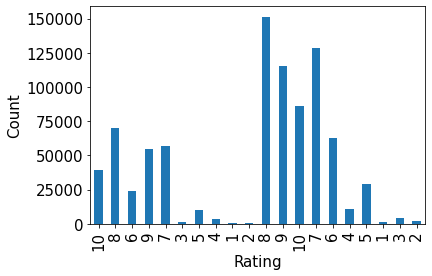

In [132]:


plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [133]:
print(anime.shape)
print(list(anime.columns))
anime.head()

(12294, 6)
['anime_id', 'name', 'genre', 'type', 'episodes', 'rating']


,anime_id,name,genre,type,episodes,rating
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82
2,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.4
3,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32
4,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36
5,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06


In [134]:
rating_count = pd.DataFrame(ratings.groupby('anime_id')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
anime_id,
1535,3243
1575,2384
226,2232
121,2199
2904,2110


In [138]:
similar_anime = anime_ratings.corrwith(bokunopico_ratings)
similar_anime = similar_anime.dropna()
df = pd.DataFrame(similar_anime)
df.head(10)

NameError: name 'bokunopico_ratings' is not defined

In [139]:
similar_anime.sort_values(ascending=False)

name
Alps no Shoujo Heidi (1979)                                   NaN
Aoi Blink                                                     NaN
Aoi Sekai no Chuushin de                                      NaN
Binchou-tan                                                   NaN
Brothers Conflict OVA                                         NaN
Buzzer Beater 2nd Season                                      NaN
Cheer Danshi!!                                                NaN
City Hunter                                                   NaN
Comet Lucifer                                                 NaN
Cossette no Shouzou                                           NaN
Detective Conan Movie 02: The Fourteenth Target               NaN
Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dragon Ball Z!     NaN
Fushigi Yuugi: Eikouden                                       NaN
Gekkan Shoujo Nozaki-kun Specials                             NaN
Hetalia: The Beautiful World Specials                         NaN
Kalei